Applicant : Santosh Kumar

### **Data Visualization** 

1) There are several libraries used in coding like Matplotlib, pandas.

2) Data is being used from last assignement of frequency measurement 

3) First cell contains all functions body with one line explanation about it and rest of the cell are used to call those functions.

4) for this file as well ***All HTML files*** should be at basepath where from jupyter notebook is being run.



In [1]:
import nltk
from bs4 import BeautifulSoup
import os
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline

basepath = os.getcwd()
documents = []
All_Files_Text = {}

# reading html and returning complete text
def getText_html(fpath):
    f = open(fpath, encoding="utf8")
    soup = BeautifulSoup(f, 'html.parser')
    return soup.get_text()

#  leading and trailing spaces removed from line
def cleanText(all_Files_Text):
    for file_name, filewise_text in all_Files_Text.items():
        lines = (line.strip() for line in filewise_text.splitlines())
        wordlist = (word.strip() for line in lines for word in line.split("  "))
        finaltext = '\n'.join(word for word in wordlist if word)
        all_Files_Text[file_name] = finaltext
    return all_Files_Text
    
    
# Lemmatizing the data - it is to group the words with similar meaning    
def lemmatizingData(all_Files_Text):
    stemmer = WordNetLemmatizer()
    
    for file_name, filewise_text in all_Files_Text.items():        
        # special characters removed
        document = re.sub(r'\W', ' ', filewise_text)
        # single characters removed
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        # single characters from the start removed
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
        # multiple spaces replaced with single space
        document = re.sub(r'\s+', ' ', document)
        # Lowercase conversion
        document = document.lower()
        # Lemmatization
        document = document.split()
        document = [stemmer.lemmatize(word) for word in document]
        all_Files_Text[file_name] = document
    return all_Files_Text

# finding frequency for each word in complete text for each file
def frequencyFinder(all_Files_Text):
    frequencyMatrix_all_files = {}    
    for file_name, filewise_text in all_Files_Text.items():
        frequency = {}
        # join all words which were lemmatized before with space inbetween         
        filewise_text = ' '.join(filewise_text)
        text_string = filewise_text.lower()
        # check for words which have 3 to 15 letters through out the text and make an array      
        match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
        # for loop to find frequency of each word exist in text  
        for word in match_pattern:
            count = frequency.get(word,0)
            frequency[word] = count + 1
        frequencyMatrix_all_files[file_name] = frequency
    return frequencyMatrix_all_files

# copying all data to Dataframe from Dictionary
def dataframefromDictionary(FrequencyInFiles):    
    df = pd.DataFrame(columns = ['FileName','Word','Frequency'])
    ite = 0
    for filename, wordfrequency in FrequencyInFiles.items():
        for word, frequency in  wordfrequency.items():
            df.loc[ite] = [filename,word,frequency]
            ite += 1
        
    return df

    

# START OF CODE - Reading all html files through for loop and saving text in one dictionary
for filename in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, filename)):
        if filename.split('.')[-1] == 'html':
            fpath = f'{basepath}\{filename}'
            text = getText_html(fpath)
            All_Files_Text[filename] = text
            
# this text is raw directly from HTML files
All_Files_Text

{'Ada_Lovelace.html': '\n\n\n\nAda Lovelace - Wikipedia\ndocument.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Ada_Lovelace","wgTitle":"Ada Lovelace","wgCurRevisionId":897378212,"wgRevisionId":897378212,"wgArticleId":974,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Spanish-language sources (es)","Wikipedia pages semi-protected against vandalism","Articles with short description","Use British English from August 2011","Use dmy dates from October 2015","Articles with hCards","All articles with self-published sources","Articles with self-published sources from November 2018","Open Library ID different from Wikidata","Articles with Open Library links","Wikipedia articles with BIBSYS identifiers","Wikipedia articles with BNE identifiers","Wikipedia article

In [2]:
#  leading and trailing spaces removed from line
All_Files_Text_cleaned = cleanText(All_Files_Text)
All_Files_Text_cleaned

{'Ada_Lovelace.html': 'Ada Lovelace - Wikipedia\ndocument.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Ada_Lovelace","wgTitle":"Ada Lovelace","wgCurRevisionId":897378212,"wgRevisionId":897378212,"wgArticleId":974,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Spanish-language sources (es)","Wikipedia pages semi-protected against vandalism","Articles with short description","Use British English from August 2011","Use dmy dates from October 2015","Articles with hCards","All articles with self-published sources","Articles with self-published sources from November 2018","Open Library ID different from Wikidata","Articles with Open Library links","Wikipedia articles with BIBSYS identifiers","Wikipedia articles with BNE identifiers","Wikipedia articles with B

In [3]:
# Lemmatizing the data - it is to group the words with similar meaning  
All_Files_Text_Lemmatized = lemmatizingData(All_Files_Text_cleaned)
All_Files_Text_Lemmatized

{'Ada_Lovelace.html': ['ada',
  'lovelace',
  'wikipedia',
  'document',
  'documentelement',
  'classname',
  'document',
  'documentelement',
  'classname',
  'replace',
  'client',
  'nojs',
  '1client',
  'j',
  '2',
  'rlconf',
  'wgcanonicalnamespace',
  'wgcanonicalspecialpagename',
  '1',
  'wgnamespacenumber',
  '0',
  'wgpagename',
  'ada_lovelace',
  'wgtitle',
  'ada',
  'lovelace',
  'wgcurrevisionid',
  '897378212',
  'wgrevisionid',
  '897378212',
  'wgarticleid',
  '974',
  'wgisarticle',
  '0',
  'wgisredirect',
  '1',
  'wgaction',
  'view',
  'wgusername',
  'null',
  'wgusergroups',
  'wgcategories',
  'cs1',
  'spanish',
  'language',
  'source',
  'e',
  'wikipedia',
  'page',
  'semi',
  'protected',
  'against',
  'vandalism',
  'article',
  'with',
  'short',
  'description',
  'use',
  'british',
  'english',
  'from',
  'august',
  '2011',
  'use',
  'dmy',
  'date',
  'from',
  'october',
  '2015',
  'article',
  'with',
  'hcards',
  'all',
  'article',
  '

In [4]:
# finding frequency for each word in complete text for each file
FrequencyInFiles = frequencyFinder(All_Files_Text_Lemmatized)
FrequencyInFiles

{'Ada_Lovelace.html': {'ada': 158,
  'lovelace': 150,
  'wikipedia': 32,
  'document': 2,
  'documentelement': 2,
  'classname': 2,
  'replace': 1,
  'client': 2,
  'nojs': 1,
  'rlconf': 1,
  'wgpagename': 1,
  'wgtitle': 1,
  'wgcurrevisionid': 1,
  'wgrevisionid': 1,
  'wgarticleid': 1,
  'wgisarticle': 1,
  'wgisredirect': 1,
  'wgaction': 1,
  'view': 4,
  'wgusername': 1,
  'null': 2,
  'wgusergroups': 1,
  'wgcategories': 1,
  'spanish': 3,
  'language': 9,
  'source': 10,
  'page': 8,
  'semi': 2,
  'protected': 2,
  'against': 2,
  'vandalism': 1,
  'article': 39,
  'with': 77,
  'short': 4,
  'description': 5,
  'use': 4,
  'british': 16,
  'english': 17,
  'from': 51,
  'august': 12,
  'dmy': 3,
  'date': 2,
  'october': 30,
  'hcards': 1,
  'all': 12,
  'self': 5,
  'published': 15,
  'november': 16,
  'open': 6,
  'library': 12,
  'different': 3,
  'wikidata': 3,
  'link': 5,
  'bibsys': 3,
  'identifier': 14,
  'bne': 3,
  'bnf': 3,
  'gnd': 3,
  'isni': 3,
  'lccn': 3,
 

In [5]:
# copying all data to Dataframe from Dictionary
df = dataframefromDictionary(FrequencyInFiles)
df

,FileName,Word,Frequency
0,Ada_Lovelace.html,ada,158
1,Ada_Lovelace.html,lovelace,150
2,Ada_Lovelace.html,wikipedia,32
3,Ada_Lovelace.html,document,2
4,Ada_Lovelace.html,documentelement,2
5,Ada_Lovelace.html,classname,2
6,Ada_Lovelace.html,replace,1
7,Ada_Lovelace.html,client,2
8,Ada_Lovelace.html,nojs,1
9,Ada_Lovelace.html,rlconf,1


In [6]:
# Listing top 10 most frequently used words from each file 
FinalMatrix = [df.loc[df.FileName==uniq].sort_values('Frequency',ascending=False).head(10) for uniq in df.FileName.unique()]
FinalMatrix

[              FileName      Word Frequency
 94   Ada_Lovelace.html       the       417
 236  Ada_Lovelace.html       and       203
 0    Ada_Lovelace.html       ada       158
 1    Ada_Lovelace.html  lovelace       150
 246  Ada_Lovelace.html       her       136
 256  Ada_Lovelace.html       she        82
 32   Ada_Lovelace.html      with        77
 79   Ada_Lovelace.html     byron        74
 249  Ada_Lovelace.html   babbage        61
 245  Ada_Lovelace.html       for        57,
               FileName       Word Frequency
 2343  Alan_Turing.html        the       994
 2264  Alan_Turing.html     turing       547
 2375  Alan_Turing.html        and       327
 2263  Alan_Turing.html       alan       192
 2310  Alan_Turing.html       with       134
 4937  Alan_Turing.html  retrieved       124
 2659  Alan_Turing.html       that       123
 2646  Alan_Turing.html        his       118
 2562  Alan_Turing.html        for       113
 2305  Alan_Turing.html       from        95,
                 Fi

In [7]:
# Spliting the FinalMatrix which was a list of Dataframes. 

FM0 = FinalMatrix[0]
FM1 = FinalMatrix[1]
FM2 = FinalMatrix[2]
FM3 = FinalMatrix[3]
FM4 = FinalMatrix[4]
FM5 = FinalMatrix[5]
FM6 = FinalMatrix[6]


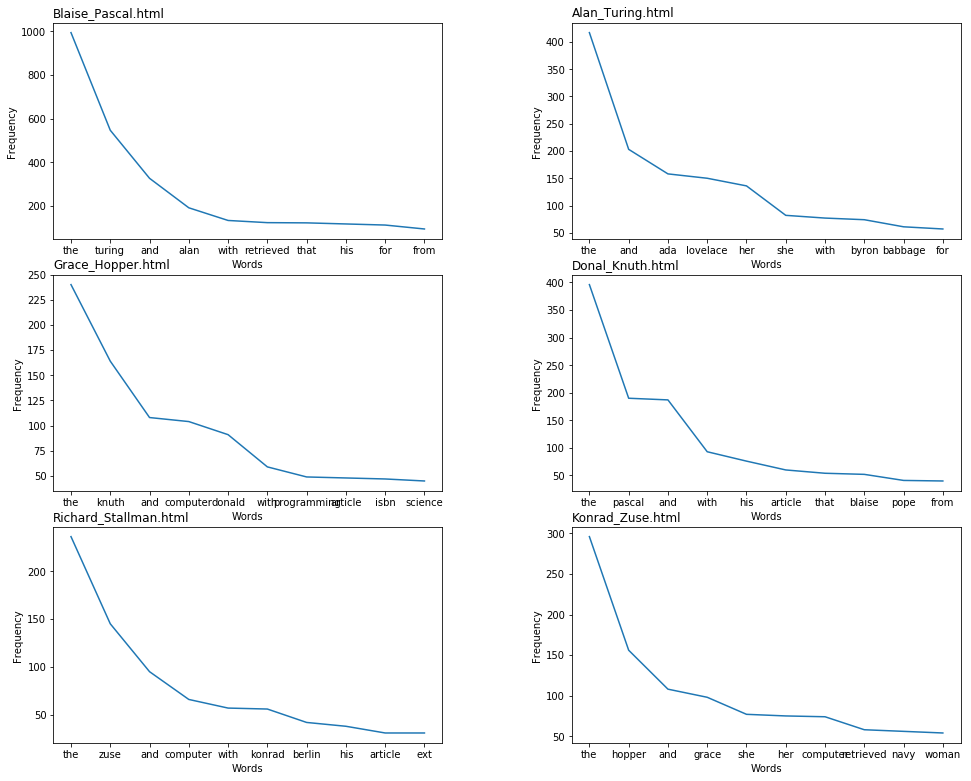

In [8]:
# Data Visualization through Matplotlib and pandas. Showing up the words which are frequently used. 


Fig = plt.figure(figsize = (18,10))
axes1 = Fig.add_axes([.5,.8,.3,.3])
axes2 = Fig.add_axes([.1,.8,.3,.3])
axes3 = Fig.add_axes([.5,.45,.3,.3])
axes4 = Fig.add_axes([.1,.45,.3,.3])
axes5 = Fig.add_axes([.5,.1,.3,.3])
axes6 = Fig.add_axes([.1,.1,.3,.3])

axes1.plot(list(FM0.Word),list(FM0.Frequency))
axes2.plot(list(FM1.Word),list(FM1.Frequency))
axes3.plot(list(FM2.Word),list(FM2.Frequency))
axes4.plot(list(FM3.Word),list(FM3.Frequency))
axes5.plot(list(FM4.Word),list(FM4.Frequency))
axes6.plot(list(FM5.Word),list(FM5.Frequency))

axes1.set_xlabel('Words')
axes2.set_xlabel('Words')
axes3.set_xlabel('Words')
axes4.set_xlabel('Words')
axes5.set_xlabel('Words')
axes6.set_xlabel('Words')

axes1.set_ylabel('Frequency')
axes2.set_ylabel('Frequency')
axes3.set_ylabel('Frequency')
axes4.set_ylabel('Frequency')
axes5.set_ylabel('Frequency')
axes6.set_ylabel('Frequency')

axes1.set_title(FM1.FileName.unique()[0],loc = 'left')
axes2.set_title(FM2.FileName.unique()[0],loc = 'left')
axes3.set_title(FM3.FileName.unique()[0],loc = 'left')
axes4.set_title(FM4.FileName.unique()[0],loc = 'left')
axes5.set_title(FM5.FileName.unique()[0],loc = 'left')
axes6.set_title(FM6.FileName.unique()[0],loc = 'left')


axes1